# Prep numbers for Methodology Review Meeting
For each agency, have a column for 
1) Non-payroll operating costs 
2) Payroll from expenditures record
3) Payroll from payroll record
4) Payroll in excess of expenditures record, hidden cost of payroll
5) Total yearly operating costs per agency
Include sum row at bottom

## Set up workspace

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import sys
import os
from sodapy import Socrata

In [3]:
sys.path.insert(0, "/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory")
from Initialize_Agencies_3Ver import get_agencies
from Agency_Classes_2Ver import Agency, StateAgency, PoliceDepartment

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/pensions/State_Pensions_2Ver.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [4]:
yr = list(range(2016,2020))
agencies = get_agencies(yr)

/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/Agency_Classes_2Ver.py:160: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  self.get_expenditures_by_year()
/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/Agency_Classes_2Ver.py:160: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  self.get_expenditures_by_year()


In [149]:
CPCS= agencies["CPCS"]

In [151]:
CPCS.expenditures.groupby("object_class")["amount"].sum().sort_values(ascending=False)

object_class
(RR) BENEFIT PROGRAMS                 843041956.080
(AA) REGULAR EMPLOYEE COMPENSATION    239774416.800
(GG) ENERGY COSTS AND SPACE RENTAL     27959809.580
(UU) IT NON-PAYROLL EXPENSES           13912081.100
(EE) ADMINISTRATIVE EXPENSES            6197441.970
(MM) PURCHASED CLIENT/PROGRAM SVCS      5135086.550
(BB) REGULAR EMPLOYEE RELATED EXPEN     4647457.670
(JJ) OPERATIONAL SERVICES               3118537.650
(KK) EQUIPMENT PURCHASE                 2026091.100
(LL) EQUIPMENT LEASE-MAINTAIN/REPAR     1208618.680
(NN) INFRASTRUCTURE:                     983963.780
(HH) CONSULTANT SVCS (TO DEPTS)          725720.690
(CC) SPECIAL EMPLOYEES                   259775.290
(FF) FACILITY OPERATIONAL EXPENSES       172105.900
(TT) LOANS AND SPECIAL PAYMENTS           15054.020
(99) PAYROLL REJECTS                       1224.000
Name: amount, dtype: float64

In [156]:
CPCS.expenditures[CPCS.expenditures["object_class"] == "(RR) BENEFIT PROGRAMS"].groupby("appropriation_name").sum()["amount"].sort_values(ascending=False)

appropriation_name
(03211510) COMPENSATION OF PRIVATE COUNSEL,                     740967829.750
(03211520) INDIGENT PERSONS' FEES AND COURT COSTS               101657685.880
(03300057) COUNSEL FOR INDIGENT SALARY ENHANCEMENT TRUST FUND      343895.060
(03211500) COMMITTEE FOR PUBLIC COUNSEL SERVICES                    62604.290
(03211606) COMMITEE FOR PUBLIC COUNSEL SERVICES                      9941.100
Name: amount, dtype: float64

In [158]:
CPCS.expenditures[CPCS.expenditures["appropriation_name"].str.contains("PRIVATE COUNSEL")]["amount"].sum()/CPCS.expenditures["amount"].sum()

0.6447799776799756

In [24]:
bostonPD = agencies["Boston PD"]
bostonPD.payroll["INJURED"].sum()/bostonPD.payroll["TOTAL EARNINGS"].sum()

0.03465811061759108

## Get numbers for slideshow

In [130]:
results_df = pd.DataFrame(columns = ["Non-Payroll Operating Expenses", "Payroll Expenses from Expenditures Data",
                                    "Payroll Expenses from Payroll Data", "Payroll Hidden Cost","Federal Dollars Removed", 
                                     "Total Yearly Operating Cost"])
non_payroll_operating = pd.DataFrame(columns=yr)
payroll_comparison = pd.DataFrame(columns=["Agency"]+["Payroll Source"] + yr)
final_comparison = pd.DataFrame(columns=yr,
                               index=["Non-Payroll Operating Expenses",
                                     "Payroll Expenditures",
                                     "True Payroll",
                                     "Stated Yearly Operating Costs",
                                     "True Yearly Operating Costs with Hidden Payroll"]).fillna(0)
for name, agency in agencies.items():
#     agency.get_final_costs()
    print("got to ", name)
    assert list(agency.non_payroll_operating_expenditures_by_year.index) == yr
    results_df.loc[name, "Non-Payroll Operating Expenses"] = agency.non_payroll_operating_expenditures_by_year.sum()
    non_payroll_operating.loc[name] = agency.non_payroll_operating_expenditures_by_year
    final_comparison.loc["Non-Payroll Operating Expenses"] += agency.non_payroll_operating_expenditures_by_year
    assert list(agency.payroll_expenditures_by_year.index) == yr
    results_df.loc[name, "Payroll Expenses from Expenditures Data"] = agency.payroll_expenditures_by_year.sum()
    payroll_comparison.loc[name +" Payroll Expenditures"] = [name] +["Payroll Expenditures"] + list(agency.payroll_expenditures_by_year)
    final_comparison.loc["Payroll Expenditures"] += agency.payroll_expenditures_by_year
    assert sorted(list(agency.true_payroll_by_year.index)) == yr
    results_df.loc[name, "Payroll Expenses from Payroll Data"] = agency.true_payroll_by_year.sum()
    payroll_comparison.loc[name+" True Payroll"] =[name] +["True Payroll"] + list(agency.true_payroll_by_year)
    results_df.loc[name, "Payroll Hidden Cost"] = agency.true_payroll_by_year.sum() - agency.payroll_expenditures_by_year.sum()
    final_comparison.loc["True Payroll"] += agency.true_payroll_by_year
    assert list(agency.federal_expenditures_by_year.index) == yr
    results_df.loc[name, "Federal Dollars Removed"] = agency.federal_expenditures_by_year.sum()
    results_df.loc[name, "Total Yearly Operating Cost"] = agency.non_payroll_operating_expenditures_by_year.sum() +\
        agency.true_payroll_by_year.sum()
    final_comparison.loc["Stated Yearly Operating Costs"] += agency.non_payroll_operating_expenditures_by_year + agency.payroll_expenditures_by_year
    final_comparison.loc["True Yearly Operating Costs with Hidden Payroll"] += agency.non_payroll_operating_expenditures_by_year + agency.true_payroll_by_year
    
results_df.loc["Total"] = results_df.sum(axis=0)
results_df["Hidden Payroll as % of Total Operating Cost"] = results_df["Payroll Hidden Cost"]/results_df["Total Yearly Operating Cost"]

got to  trial_court
got to  CPCS
got to  DOC
got to  Suffolk DA
got to  Suffolk Sheriff
got to  State_Police
got to  MBTA
got to  DAA
got to  MA Sheriff's Association
got to  Parole Board
got to  CJT
got to  Supreme_Judicial_Court
got to  Appeals_Court
got to  Boston PD
got to  Chelsea PD
got to  Revere PD
got to  Winthrop PD


## Make charts for slideshow

In [36]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 18), "lines.linewidth": 5})
sns.set_style("darkgrid")

I can't fit each agency on my line charts, so I'll take out the smallest ones. We will have to look at them when we check math but not important to tell story

In [39]:
agencies_to_visualize = ["trial_court", "CPCS", "DOC", "Suffolk DA", "Suffolk Sheriff", "State_Police", "MBTA", "Boston PD", "Chelsea PD", "Revere PD"]

In [72]:
results_df.reset_index()[results_df.reset_index()["index"].isin(agencies_to_visualize)]\
["Total Yearly Operating Cost"].sum()/results_df.loc["Total", "Total Yearly Operating Cost"]

0.9696955901240224

These agencies make up 97% of yearly operating costs, so dropping the DAA and winthrop police etc is fine for visualization purposes

### Non-Payroll

In [50]:
non_payroll_melted = non_payroll_operating.loc[agencies_to_visualize].reset_index().melt(id_vars =["index"])

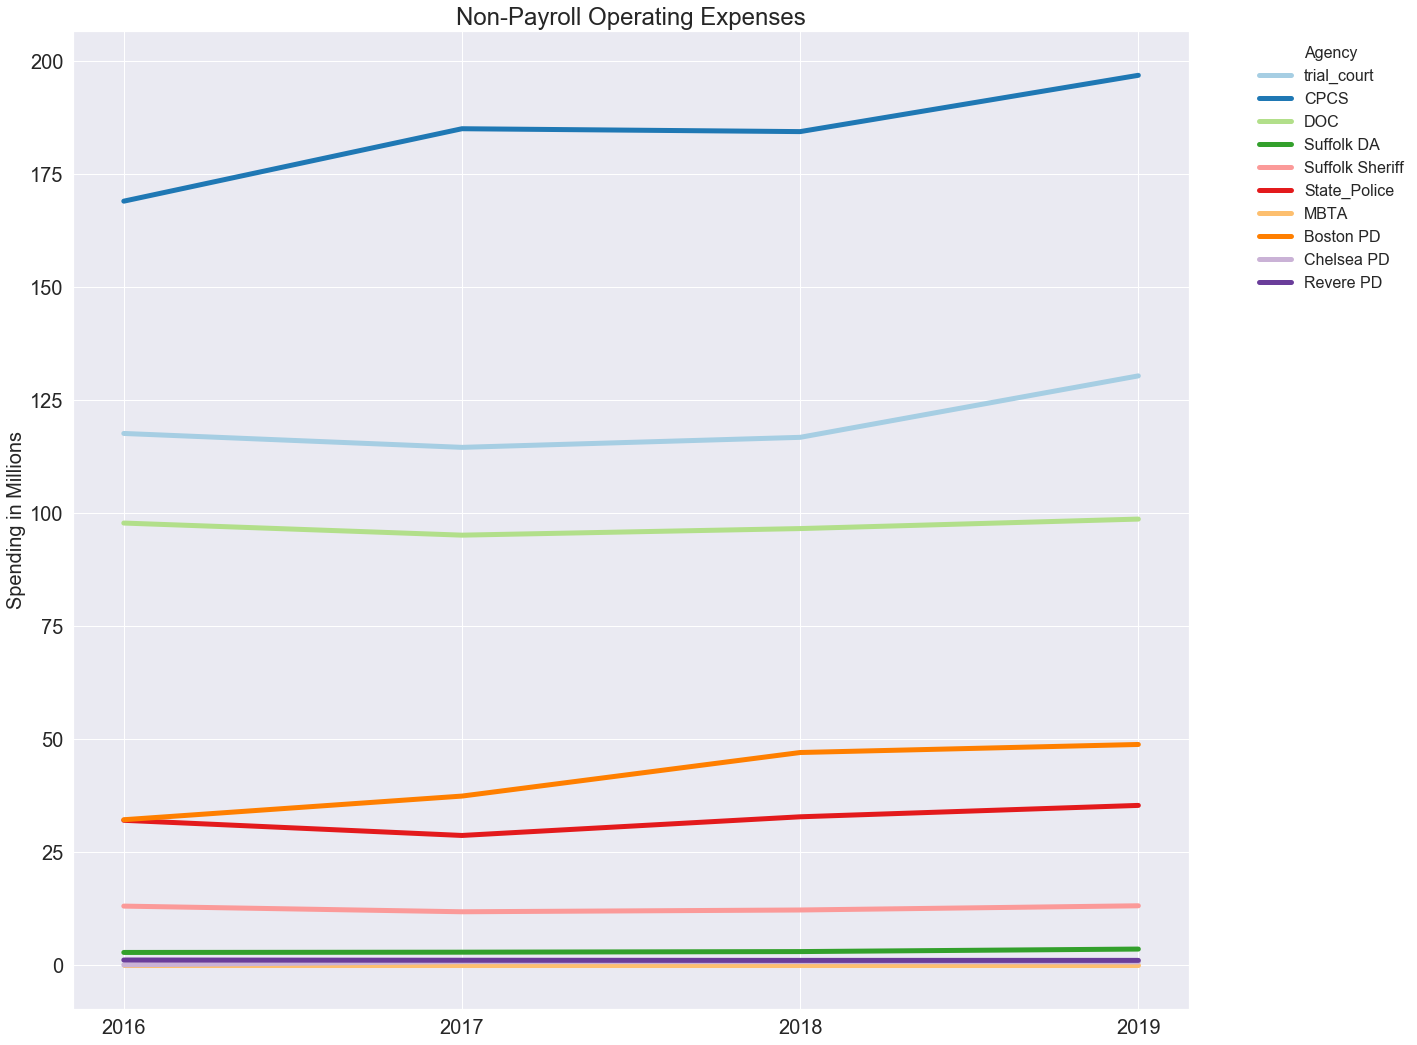

In [51]:
non_payroll_melted["value_in_millions"] = (non_payroll_melted["value"] / 10 ** 6).astype(float)
non_payroll_melted.rename(columns={"index":"Agency"}, inplace=True)
palette = sns.color_palette("Paired", non_payroll_melted["Agency"].nunique())
fig, ax = plt.subplots(1, 1)
plt.ticklabel_format(style='plain', axis='y')
p = sns.lineplot(x="variable", y="value_in_millions", hue="Agency", palette=palette, sort=False, data=non_payroll_melted)
p.set_title("Non-Payroll Operating Expenses", fontsize=24)
ax.legend(frameon=False, fontsize=16, bbox_to_anchor=(1.05, 1))
plt.xticks(list(range(2016, 2020)))
p.set_ylabel("Spending in Millions", fontsize=20)
p.set_xlabel("")
p.tick_params(labelsize=20)

### Compare payroll expenditures and true payroll

In [59]:
payroll_comparison_for_visualize = payroll_comparison.loc[payroll_comparison["Agency"].isin(agencies_to_visualize)]

In [60]:
payroll_melted = payroll_comparison_for_visualize.melt(id_vars=["Agency","Payroll Source"])

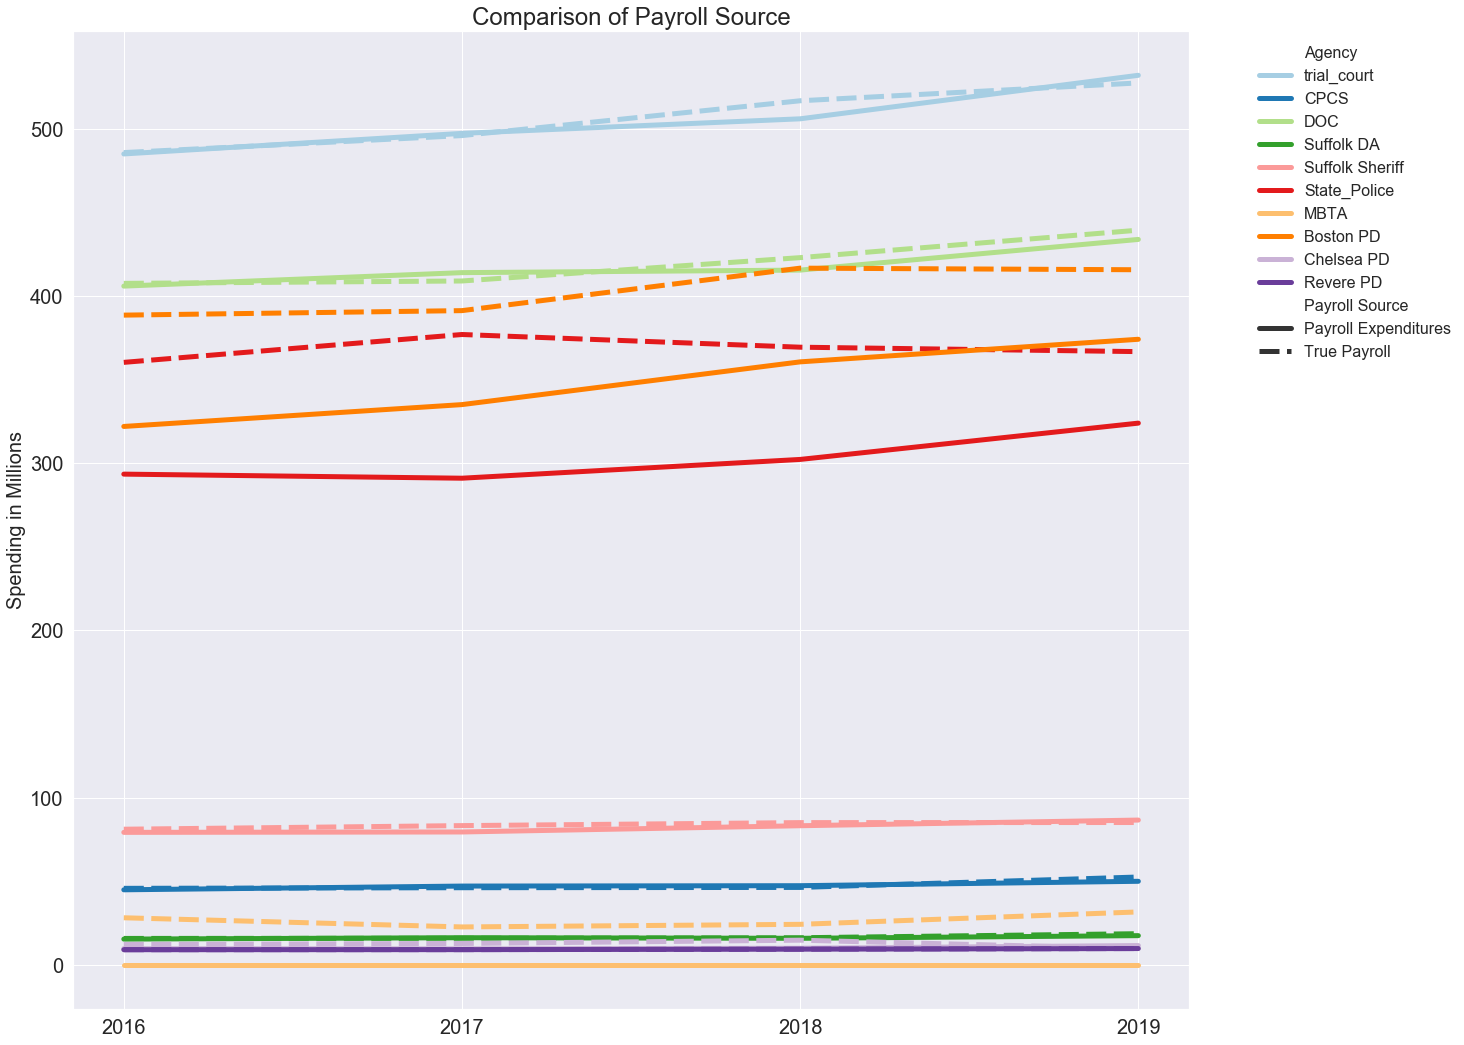

In [63]:
payroll_melted["value_in_millions"] = (payroll_melted["value"] / 10 ** 6).astype(float)
palette = sns.color_palette("Paired", payroll_melted["Agency"].nunique())
fig, ax = plt.subplots(1, 1)
plt.ticklabel_format(style='plain', axis='y')
p = sns.lineplot(x="variable", y="value_in_millions", hue="Agency",style = "Payroll Source", 
                 palette=palette, sort=False, data=payroll_melted)
p.set_title("Comparison of Payroll Source", fontsize=24)
ax.legend(frameon=False, fontsize=16, bbox_to_anchor=(1.05, 1))
plt.xticks(list(range(2016, 2020)))
p.set_ylabel("Spending in Millions", fontsize=20)
p.set_xlabel("")
p.tick_params(labelsize=20)

### Cops account for a lot of hidden payroll
Ok, there are 3 agencies whose true payroll is meaningfully higher: state police, chelsea PD, Boston PD. Compare these 3 to everything else. Exclude MBTA because it's all hidden costs so it's not directly comporable.

In [101]:
payroll_comparison_for_visualize["Is Police"] = payroll_comparison_for_visualize["Agency"]\
.isin(["State_Police", "Boston PD", "Chelsea PD", "MBTA"])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
payroll_melted_compare_police = payroll_comparison_for_visualize.drop(columns = ["Agency"]).melt(id_vars=["Is Police", "Payroll Source"])

In [104]:
payroll_melted_compare_police

,Is Police,Payroll Source,variable,value
0,False,Payroll Expenditures,2016,484995915.190
1,False,True Payroll,2016,485808825.610
2,False,Payroll Expenditures,2016,44871695.580
3,False,True Payroll,2016,45747841.720
4,False,Payroll Expenditures,2016,405945740.960
...,...,...,...,...
75,True,True Payroll,2019,415725606.800
76,True,Payroll Expenditures,2019,11526261.800
77,True,True Payroll,2019,9685922.000
78,False,Payroll Expenditures,2019,9735336.000


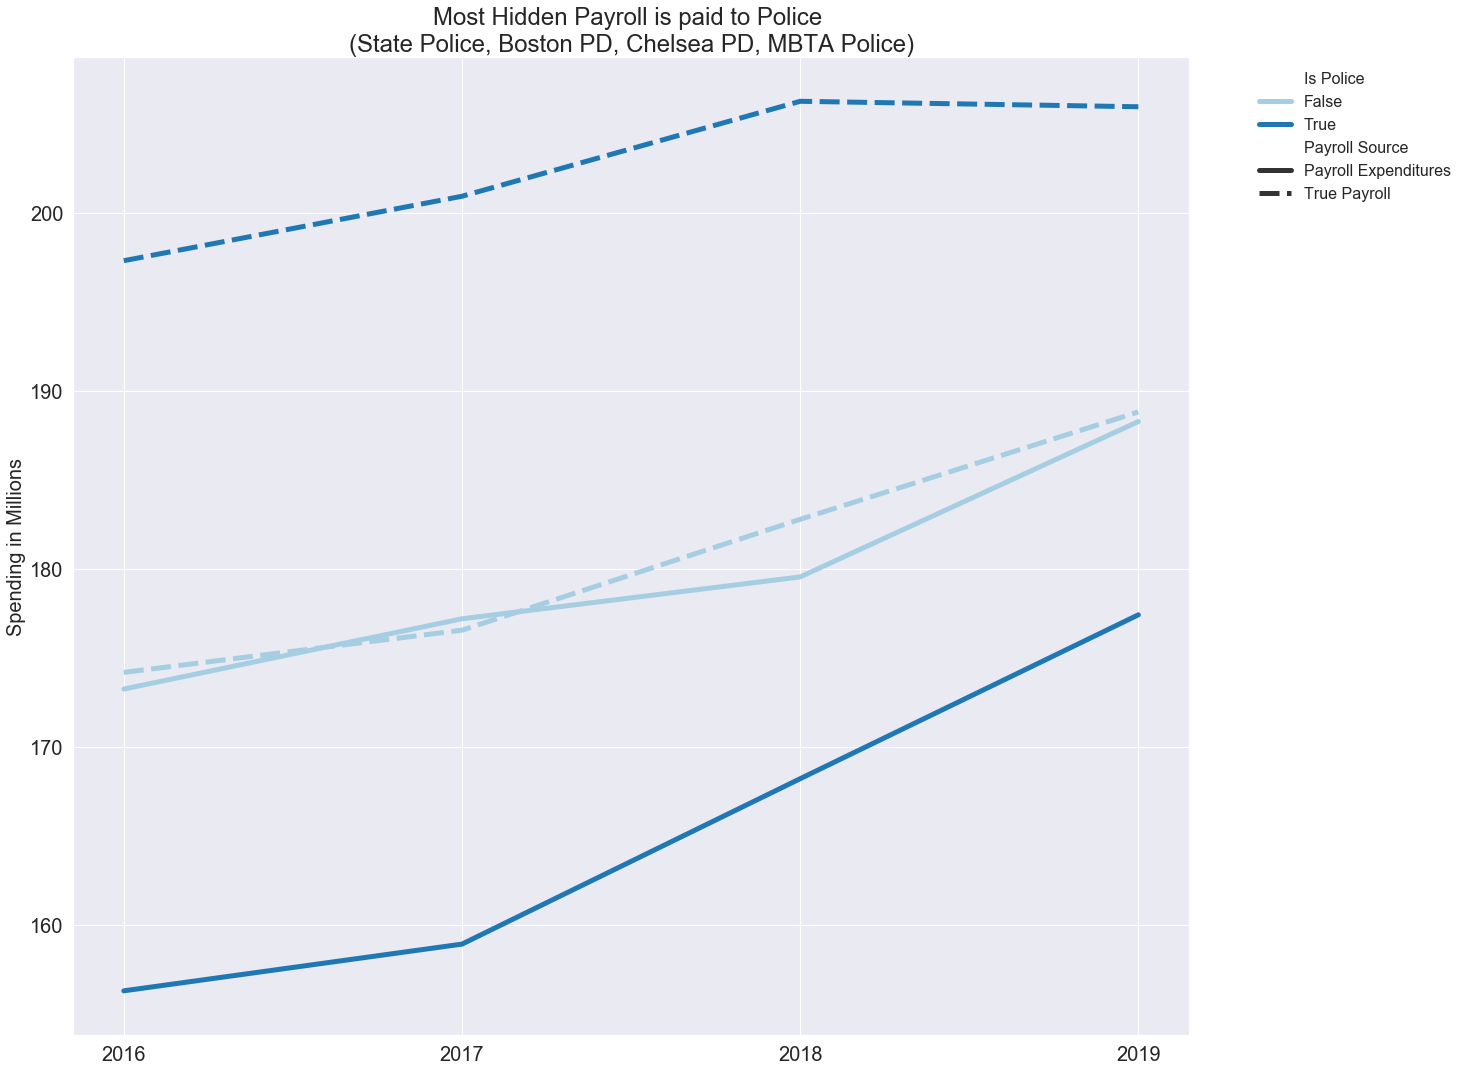

In [106]:
payroll_melted_compare_police["value_in_millions"] = (payroll_melted_compare_police["value"] / 10 ** 6).astype(float)
palette = sns.color_palette("Paired", payroll_melted_compare_police["Is Police"].nunique())
fig, ax = plt.subplots(1, 1)
plt.ticklabel_format(style='plain', axis='y')
p = sns.lineplot(x="variable", y="value_in_millions", hue="Is Police", style = "Payroll Source", 
                 palette=palette, sort=False, data=payroll_melted_compare_police, ci=None)
p.set_title("Most Hidden Payroll is paid to Police \n(State Police, Boston PD, Chelsea PD, MBTA Police)", fontsize=24)
ax.legend(frameon=False, fontsize=16, bbox_to_anchor=(1.05, 1))
plt.xticks(list(range(2016, 2020)))
p.set_ylabel("Spending in Millions", fontsize=20)
p.set_xlabel("")
p.tick_params(labelsize=20)

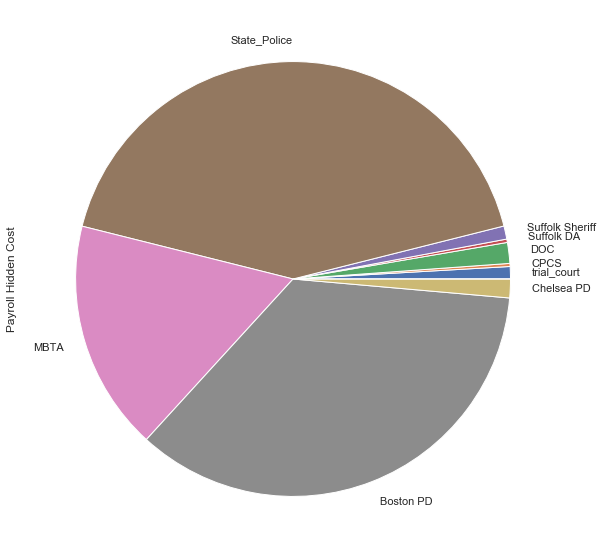

In [121]:
results_df.loc[agencies_to_visualize]["Payroll Hidden Cost"].plot.pie(y="Payroll Hidden Cost", figsize=(10,10))

In [122]:
results_df

,Non-Payroll Operating Expenses,Payroll Expenses from Expenditures Data,Payroll Expenses from Payroll Data,Payroll Hidden Cost,Federal Dollars Removed,Total Yearly Operating Cost,Hidden Payroll as % of Total Operating Cost
trial_court,479060751.300,2020324978.770,2026042500.810,5717522.040,5331525.890,2505103252.110,0.002
CPCS,735095104.550,189260550.810,190677741.190,1417190.380,1793873.100,925772845.740,0.002
DOC,387942618.360,1669329836.530,1678961549.040,9631712.510,2638126.140,2066904167.400,0.005
Suffolk DA,11948259.980,64910958.380,66468933.580,1557975.200,182247.870,78417193.560,0.020
Suffolk Sheriff,49923917.450,328450477.010,334544789.840,6094312.830,369445.560,384468707.290,0.016
State_Police,128620390.550,1210801890.740,1473498649.990,262696759.250,34074815.730,1602119040.540,0.164
MBTA,0,0,106661440.010,106661440.010,0,106661440.010,1.000
DAA,10974365.010,3610164.950,4221720.850,611555.900,712857.980,15196085.860,0.040
MA Sheriff's Association,366068.130,1016796.790,914844.660,-101952.130,0.000,1280912.790,-0.080
Parole Board,5916101.290,58806434.210,59394845.650,588411.440,1334546.540,65310946.940,0.009


## Final comparison
Over the 4 year time range, compare 

- Total non-payroll operating costs
- Total Payroll expenditures
- Total True payroll
- Total Stated operating costs 
- True operating cost including hidden payroll

In [145]:
final_comparison

,2016,2017,2018,2019
Non-Payroll Operating Expenses,494014737.699,506503419.967,523758786.403,561658206.204
Payroll Expenditures,1706800653.791,1741030344.033,1792938578.117,1885302837.036
True Payroll,1873600272.340,1905078834.130,1963679896.490,2009384954.860
Stated Yearly Operating Costs,2200815391.490,2247533764.000,2316697364.520,2446961043.240
True Yearly Operating Costs with Hidden Payroll,2367615010.039,2411582254.097,2487438682.893,2571043161.064


In [146]:
final_melted = final_comparison.reset_index().melt(id_vars=["index"])

In [147]:
final_melted

,index,variable,value
0,Non-Payroll Operating Expenses,2016,494014737.699
1,Payroll Expenditures,2016,1706800653.791
2,True Payroll,2016,1873600272.340
3,Stated Yearly Operating Costs,2016,2200815391.490
4,True Yearly Operating Costs with Hidden Payroll,2016,2367615010.039
5,Non-Payroll Operating Expenses,2017,506503419.967
6,Payroll Expenditures,2017,1741030344.033
7,True Payroll,2017,1905078834.130
8,Stated Yearly Operating Costs,2017,2247533764.000
9,True Yearly Operating Costs with Hidden Payroll,2017,2411582254.097


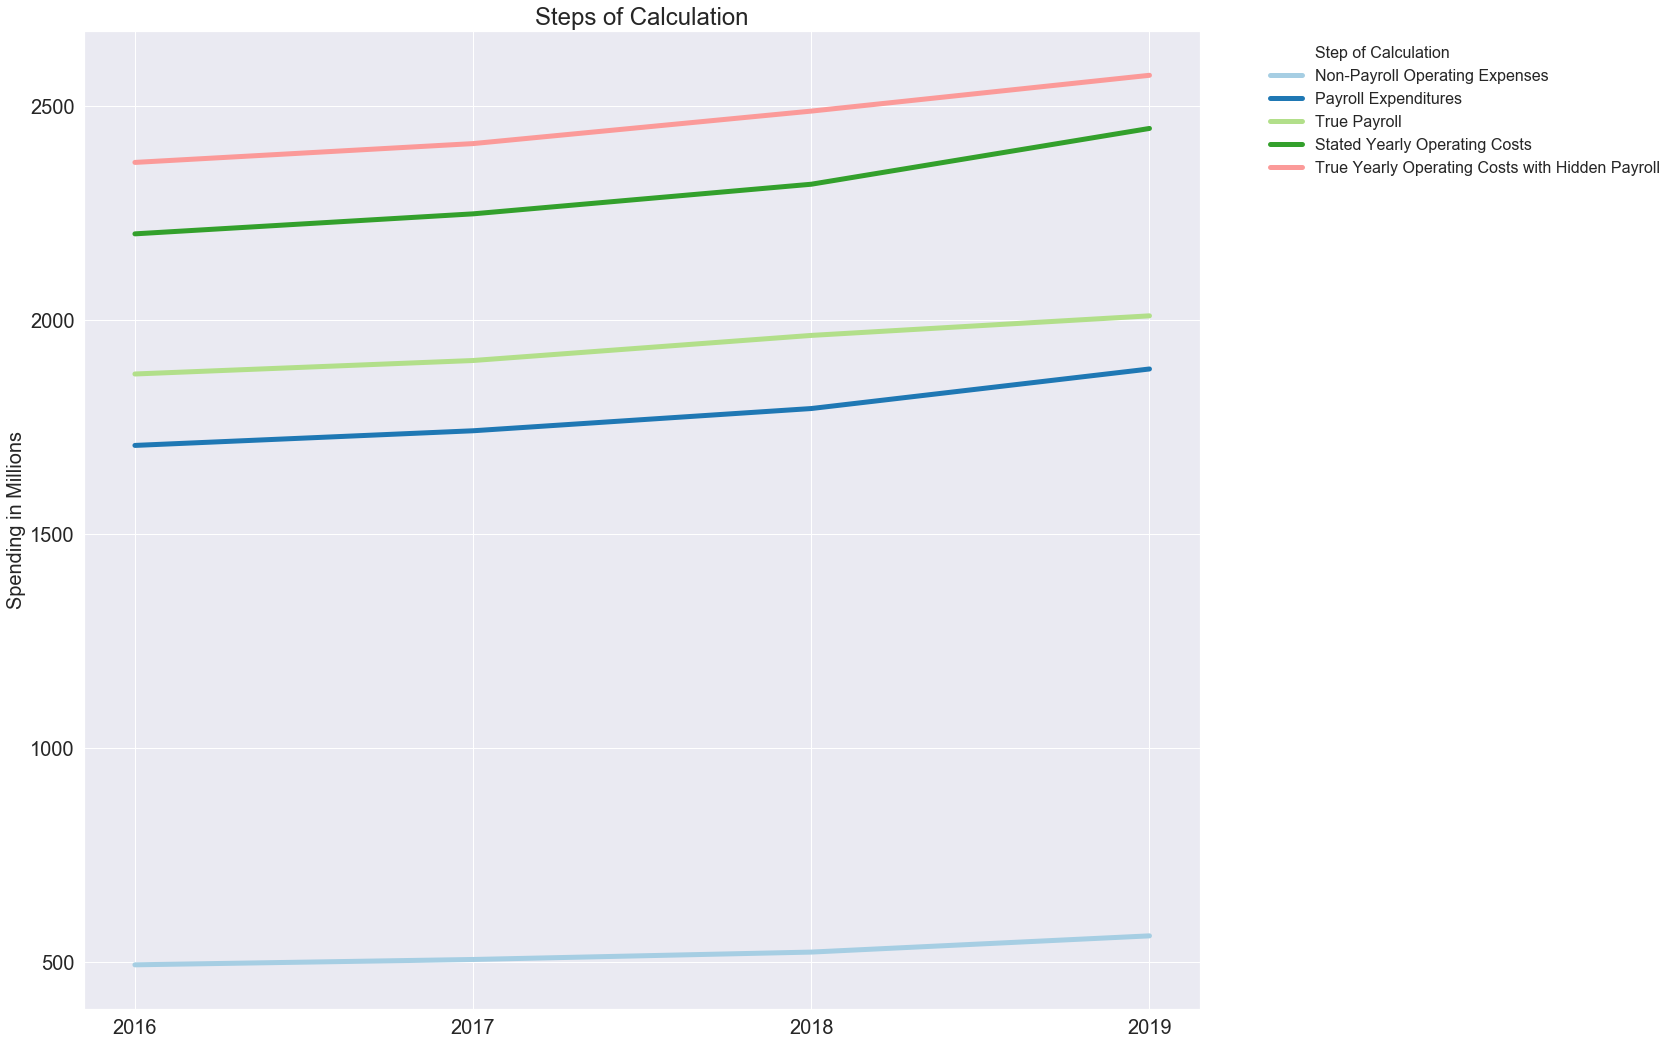

In [148]:
final_melted["value_in_millions"] = (final_melted["value"] / 10 ** 6).astype(float)
final_melted.rename(columns={"index":"Step of Calculation"}, inplace=True)
palette = sns.color_palette("Paired", final_melted["Step of Calculation"].nunique())
fig, ax = plt.subplots(1, 1)
plt.ticklabel_format(style='plain', axis='y')
p = sns.lineplot(x="variable", y="value_in_millions", hue="Step of Calculation",
                 palette=palette, sort=False, data=final_melted)
p.set_title("Steps of Calculation", fontsize=24)
ax.legend(frameon=False, fontsize=16, bbox_to_anchor=(1.05, 1))
plt.xticks(list(range(2016, 2020)))
p.set_ylabel("Spending in Millions", fontsize=20)
p.set_xlabel("")
p.tick_params(labelsize=20)

## Results DF in millions

In [162]:
results_df_for_screenshot = results_df/10**6/4
results_df_for_screenshot["Hidden Payroll as % of Total Operating Cost"] = results_df_for_screenshot["Payroll Hidden Cost"]/results_df_for_screenshot["Total Yearly Operating Cost"]

In [163]:
results_df_for_screenshot

,Non-Payroll Operating Expenses,Payroll Expenses from Expenditures Data,Payroll Expenses from Payroll Data,Payroll Hidden Cost,Federal Dollars Removed,Total Yearly Operating Cost,Hidden Payroll as % of Total Operating Cost
trial_court,119.765,505.081,506.511,1.429,1.333,626.276,0.002
CPCS,183.774,47.315,47.669,0.354,0.448,231.443,0.002
DOC,96.986,417.332,419.740,2.408,0.660,516.726,0.005
Suffolk DA,2.987,16.228,16.617,0.389,0.046,19.604,0.020
Suffolk Sheriff,12.481,82.113,83.636,1.524,0.092,96.117,0.016
State_Police,32.155,302.700,368.375,65.674,8.519,400.530,0.164
MBTA,0.000,0.000,26.665,26.665,0.000,26.665,1.000
DAA,2.744,0.903,1.055,0.153,0.178,3.799,0.040
MA Sheriff's Association,0.092,0.254,0.229,-0.025,0.000,0.320,-0.080
Parole Board,1.479,14.702,14.849,0.147,0.334,16.328,0.009
